# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')
print(customers.shape)
customers.head()

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.dtypes # only int
stats = customers.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats['outliers_low'] = (stats['25%'] - 1.5*stats['IQR'])>stats['min']
stats['outliers_up'] = (stats['75%'] + 1.5*stats['IQR'])<stats['max']
stats.transpose()

#there is upper outliers in all wholesale columns. but could still be important (see pareto).

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.0,440.0,440.0,440.0,440.0,440.0,440.0,440.0
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.0,1.0,3.0,55.0,3.0,25.0,3.0,3.0
25%,1.0,2.0,3127.75,1533.0,2153.0,742.25,256.75,408.25
50%,1.0,3.0,8504.0,3627.0,4755.5,1526.0,816.5,965.5
75%,2.0,3.0,16933.75,7190.25,10655.75,3554.25,3922.0,1820.25
max,2.0,3.0,112151.0,73498.0,92780.0,60869.0,40827.0,47943.0
IQR,1.0,1.0,13806.0,5657.25,8502.75,2812.0,3665.25,1412.0
outliers_low,False,False,False,False,False,False,False,False


In [4]:
#checking if pareto holds up
for column in ('Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'):
    q80 = customers[customers[column] <= customers[column].quantile(q=0.8)]
    print(f'80% of Customers for {column} \tmade up {round(q80[column].sum()/customers[column].sum()*100,1)} % of the sales.')
print("So not quite pareto, but the skewed distribution is visible, 80% of customers always only responsible for less than 50%.")

80% of Customers for Fresh 	made up 47.3 % of the sales.
80% of Customers for Milk 	made up 43.9 % of the sales.
80% of Customers for Grocery 	made up 44.3 % of the sales.
80% of Customers for Frozen 	made up 37.6 % of the sales.
80% of Customers for Detergents_Paper 	made up 30.3 % of the sales.
80% of Customers for Delicassen 	made up 42.6 % of the sales.
So not quite pareto, but the skewed distribution is visible, 80% of customers always only responsible for less than 50%.


In [5]:
customers.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [14]:
#delete highest outlier? no I'm not sure I won't loose necessary data yet.

#Did not do it in the first round of solving the lab. But the results were not good. So I'll try deleting far off outliers.
#The written comments below were all for the code without deleting the outliers. Only ran the code again to see if the data
# without outliers would produce much better clusters. The clusters look partly better, but that could also be a scale issue.
# Did not check the cluster quality before and after.

#Did this cleanup by visually checking the boxplots, not by the mathematical definition of outliers, because I want to keep most.
print(len(customers[customers["Delicassen"]>15000]))
customers = customers[customers["Fresh"] < 60000] #deleted 3 rows
customers = customers[customers["Milk"] < 50000] #deleted 2 rows
customers = customers[customers["Frozen"] < 20000] #deleted 3 rows
customers = customers[customers["Detergents_Paper"] < 20000] #deleted 4 rows
customers = customers[customers["Delicassen"] < 15000] #deleted 1 rows
print(len(customers))
#total rows deleted because of outliers: 13

1
427


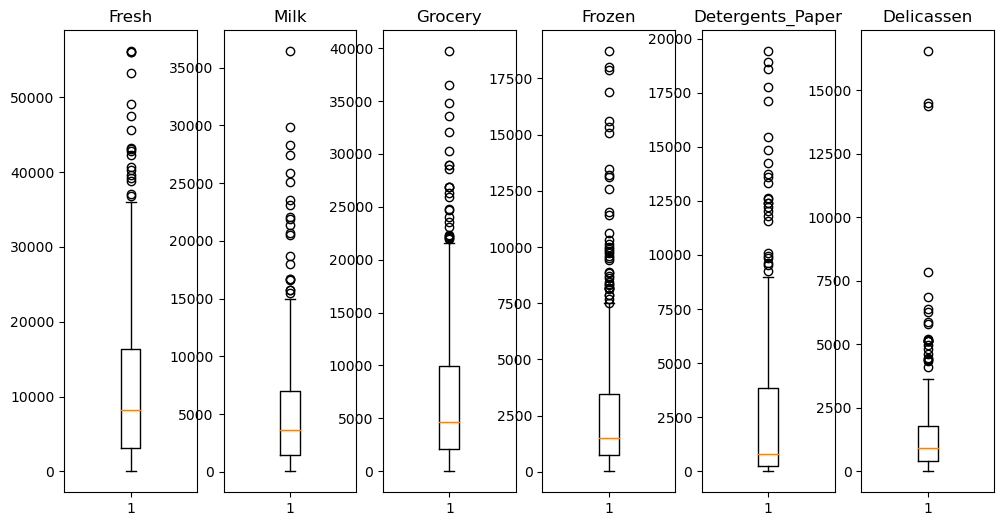

In [13]:
#looking at outliers closer
plot_options, (chart_1, chart_2, chart_3, chart_4, chart_5, chart_6) = plt.subplots(1,6, figsize=(12,6))
chart_1.boxplot(customers["Fresh"])
chart_1.set_title("Fresh")
chart_2.boxplot(customers["Milk"])
chart_2.set_title("Milk")
chart_3.boxplot(customers["Grocery"])
chart_3.set_title("Grocery")
chart_4.boxplot(customers["Frozen"])
chart_4.set_title("Frozen")
chart_5.boxplot(customers["Detergents_Paper"])
chart_5.set_title("Detergents_Paper")
chart_6.boxplot(customers["Delicassen"])
chart_6.set_title("Delicassen")
plt.show()

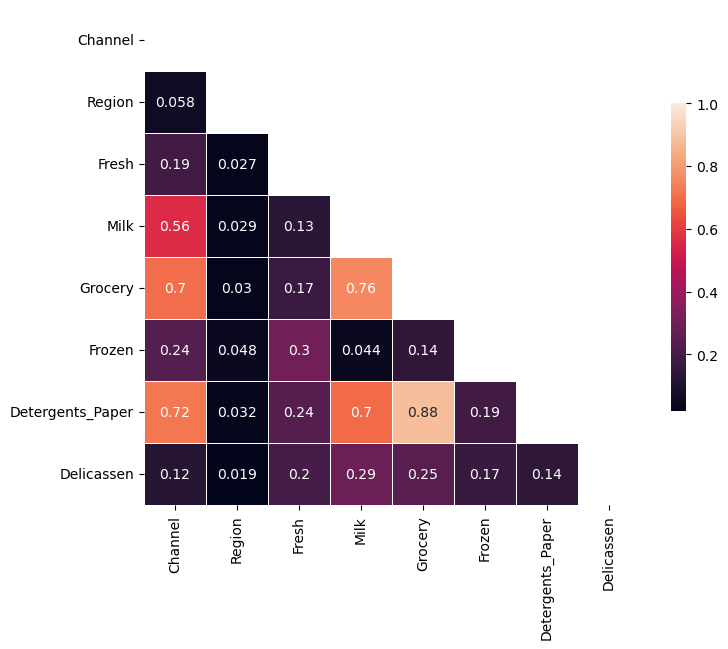

In [15]:
import seaborn as sn
corr=np.abs(customers.corr())

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(8, 8))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)
plt.show()

In [9]:
#high correlation btw detergents_paper and grocery. I should drop one of them. 
## I would drop Grocery because it also shows the second highest corr with Milk.
# column region does not correlate to anything -> drop that in total.

In [16]:
customers.isna().sum() #no missing data

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [11]:
# Your observations here
# All colums are int values with no NULL values. 
# Only region and channel hold discrete values, the other colums have spending values in them. Size of values varies a lot.
# all the columns on product groups are skewed because they have outliers on the far upper end, a few customers with high spendings.

#Because of high correlation, I would drop the column Grocery.
#Because of missing correlation, I would drop the column Region.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [17]:
# Your code here
customers = customers.drop(columns=["Region"])

In [114]:
# Your comment here
# Not cleaning the outliers as they seem important, if we are researching pareto.
#But dropping 1 column because of no correlation.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [18]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
scaler.fit(customers)
customers_scaled = scaler.transform(customers)

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [19]:
# Your code here:
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=3)
fitted = kmeans.fit(customers_scaled)
pred = kmeans.predict(customers_scaled)

customers['labels'] = fitted.labels_

Count the values in `labels`.

In [20]:
# Your code here:
customers['labels'].value_counts()

1    237
2    130
0     60
Name: labels, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [21]:
# Your code here
dbscan = cluster.DBSCAN(eps=0.5)
fitted = dbscan.fit(customers_scaled)

customers['labels_DBSCAN'] = fitted.labels_

Count the values in `labels_DBSCAN`.

In [22]:
# Your code here
customers['labels_DBSCAN'].value_counts()

-1    290
 0    137
Name: labels_DBSCAN, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

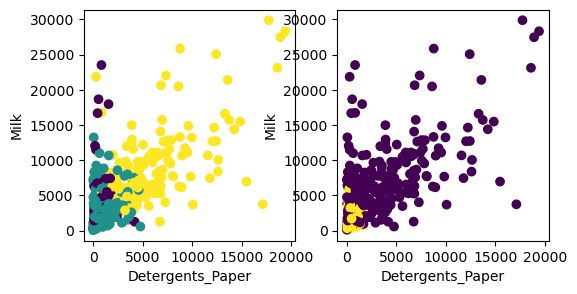

In [23]:
# Your code here:
plot_options, (chart_1, chart_2) = plt.subplots(1,2, figsize=(6,3))
chart_1.scatter(customers["Detergents_Paper"], customers["Milk"], c=customers["labels"])
chart_1.set_xlabel("Detergents_Paper")
chart_1.set_ylabel("Milk")
chart_2.scatter(customers["Detergents_Paper"], customers["Milk"], c=customers["labels_DBSCAN"])
chart_2.set_xlabel("Detergents_Paper")
chart_2.set_ylabel("Milk")
plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

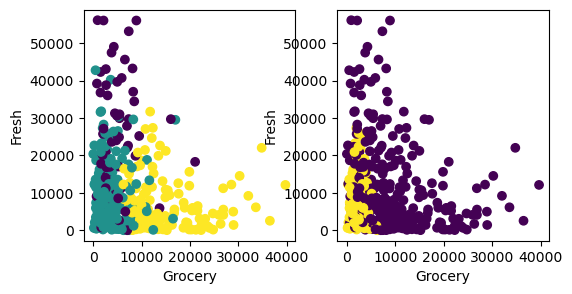

In [24]:
# Your code here:
plot_options, (chart_1, chart_2) = plt.subplots(1,2, figsize=(6,3))
chart_1.scatter(customers["Grocery"], customers["Fresh"], c=customers["labels"])
chart_1.set_xlabel("Grocery")
chart_1.set_ylabel("Fresh")
chart_2.scatter(customers["Grocery"], customers["Fresh"], c=customers["labels_DBSCAN"])
chart_2.set_xlabel("Grocery")
chart_2.set_ylabel("Fresh")
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

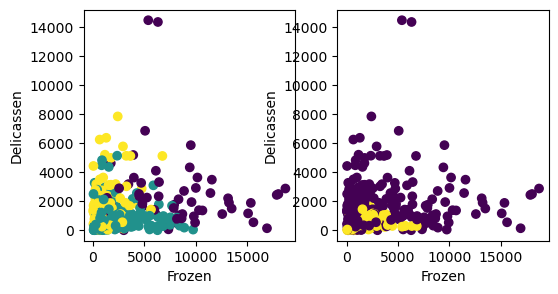

In [25]:
# Your code here:
plot_options, (chart_1, chart_2) = plt.subplots(1,2, figsize=(6,3))
chart_1.scatter(customers["Frozen"], customers["Delicassen"], c=customers["labels"])
chart_1.set_xlabel("Frozen")
chart_1.set_ylabel("Delicassen")
chart_2.scatter(customers["Frozen"], customers["Delicassen"], c=customers["labels_DBSCAN"])
chart_2.set_xlabel("Frozen")
chart_2.set_ylabel("Delicassen")
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [26]:
# Your code here:
customers.groupby("labels").mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,
0,1.100000,25987.100000,4914.850000,4981.150000,8063.400000,763.266667,2500.483333,-1.000000
1,1.016878,9613.497890,2579.628692,3349.835443,2078.063291,713.518987,888.603376,-0.421941
2,1.961538,7306.276923,9754.415385,15052.746154,1404.523077,6665.069231,1620.776923,-1.000000


In [27]:
customers.groupby("labels_DBSCAN").mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,
-1,1.465517,12471.817241,6678.700000,9462.062069,3163.344828,3542.800000,1669.710345,1.241379
0,1.000000,8544.627737,1733.678832,2230.941606,1762.941606,393.773723,635.861314,1.000000


Which algorithm appears to perform better?

In [28]:
# Your observations here
# K-Means shows very differnent means for every column every label.
# In DBScan results there is sometimes a similar mean for two different labels in one feature column. But that is to be expected,
#  as DBSCAN does not only check linear relationships.

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

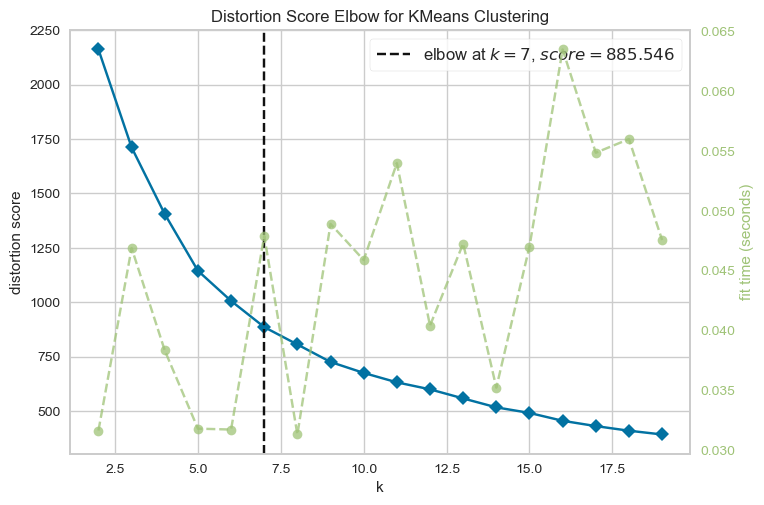

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [133]:
# Your code here
# I don't want to experiment, the scatterplots looked not so great above. So I'll try this method instead.
from yellowbrick.cluster import KElbowVisualizer

model = cluster.KMeans() 
visualizer = KElbowVisualizer(model, k=(2,20)) 
visualizer.fit(customers_scaled)
visualizer.poof()

In [29]:
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=7)
fitted = kmeans.fit(customers_scaled)
pred = kmeans.predict(customers_scaled)

customers['labels_k7'] = fitted.labels_
customers['labels_k7'].value_counts()

2    189
5     69
0     55
4     45
3     42
1     14
6     13
Name: labels_k7, dtype: int64

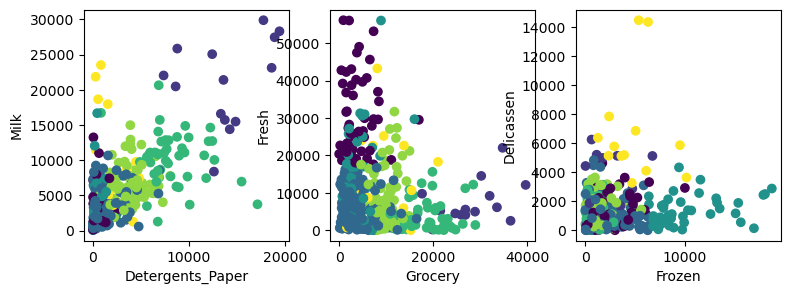

In [30]:
plot_options, (chart_1, chart_2, chart_3) = plt.subplots(1,3, figsize=(9,3))
chart_1.scatter(customers["Detergents_Paper"], customers["Milk"], c=customers["labels_k7"])
chart_1.set_xlabel("Detergents_Paper")
chart_1.set_ylabel("Milk")
chart_2.scatter(customers["Grocery"], customers["Fresh"], c=customers["labels_k7"])
chart_2.set_xlabel("Grocery")
chart_2.set_ylabel("Fresh")
chart_3.scatter(customers["Frozen"], customers["Delicassen"], c=customers["labels_k7"])
chart_3.set_xlabel("Frozen")
chart_3.set_ylabel("Delicassen")
plt.show()

In [ ]:
# Your comment here
#k=7 seems to be optimal, the spot in the elbow.
# visually, I cannot see the clusters very well. Outlier cleaning might help. Or looking at different axis.

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

 1    217
-1    165
 0     45
Name: labels_dbscan_opt, dtype: int64


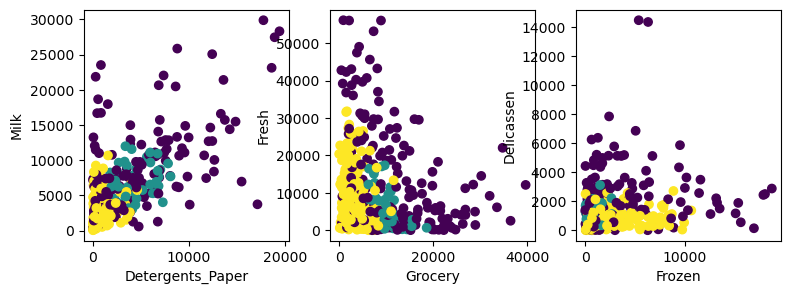

In [31]:
# Your code here
dbscan = cluster.DBSCAN(eps=0.9, min_samples = 10)
fitted = dbscan.fit(customers_scaled)

customers['labels_dbscan_opt'] = fitted.labels_
print(customers['labels_dbscan_opt'].value_counts())

plot_options, (chart_1, chart_2, chart_3) = plt.subplots(1,3, figsize=(9,3))
chart_1.scatter(customers["Detergents_Paper"], customers["Milk"], c=customers["labels_dbscan_opt"])
chart_1.set_xlabel("Detergents_Paper")
chart_1.set_ylabel("Milk")
chart_2.scatter(customers["Grocery"], customers["Fresh"], c=customers["labels_dbscan_opt"])
chart_2.set_xlabel("Grocery")
chart_2.set_ylabel("Fresh")
chart_3.scatter(customers["Frozen"], customers["Delicassen"], c=customers["labels_dbscan_opt"])
chart_3.set_xlabel("Frozen")
chart_3.set_ylabel("Delicassen")
plt.show()

In [ ]:
# Your comment here